In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
filename = "dfa_analysis_data.xlsx"
sheetname = "factors"

df = pd.read_excel(filename, sheet_name = sheetname)
df.set_index("Date", inplace = True)
df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0289,-0.0255,-0.0239,0.0022
1926-08-31,0.0264,-0.0114,0.0381,0.0025
1926-09-30,0.0038,-0.0136,0.0005,0.0023
1926-10-31,-0.0327,-0.0014,0.0082,0.0032
1926-11-30,0.0254,-0.0011,-0.0061,0.0031
...,...,...,...,...
2025-04-30,-0.0084,-0.0059,-0.0340,0.0035
2025-05-31,0.0606,0.0070,-0.0288,0.0038
2025-06-30,0.0486,0.0083,-0.0160,0.0034


In [15]:
# mkt_df = pd.DataFrame(df["Mkt-RF"])
mkt_df = df
mkt_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0289,-0.0255,-0.0239,0.0022
1926-08-31,0.0264,-0.0114,0.0381,0.0025
1926-09-30,0.0038,-0.0136,0.0005,0.0023
1926-10-31,-0.0327,-0.0014,0.0082,0.0032
1926-11-30,0.0254,-0.0011,-0.0061,0.0031
...,...,...,...,...
2025-04-30,-0.0084,-0.0059,-0.0340,0.0035
2025-05-31,0.0606,0.0070,-0.0288,0.0038
2025-06-30,0.0486,0.0083,-0.0160,0.0034


In [21]:
sample_80 = mkt_df[(mkt_df.index <= "1980-12-31")]
sample_81_01 = mkt_df[(mkt_df.index >= "1981-01-01") & (mkt_df.index <= "2001-12-31")]
sample_02_end = mkt_df[(mkt_df.index > "2001-12-31")]

In [22]:
samples = {
    "begin-1980": sample_80,
    "1981–2001": sample_81_01,
    "2002–end": sample_02_end
}
statistics = []

for label, sample in samples.items():
    stat = pd.DataFrame({
        "mean": sample.mean() * 12,
        "vol": sample.std() * np.sqrt(12),
        "sharpe": (sample.mean() * 12) / (sample.std() * np.sqrt(12))
    })
    statistics.append(stat)

stats_df = pd.concat(statistics, axis = 1, keys=samples.keys())
stats_df.style.format("{:,.2%}")

<Axes: xlabel='Date'>

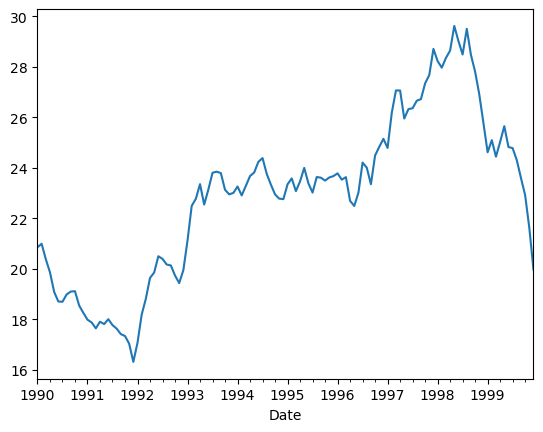

In [28]:
cum_return = (mkt_df + 1).cumprod()
cum_ret = cum_return[(cum_return.index >= "1990-01-01") & (cum_return.index <= "1999-12-31")]
cum_ret["HML"].plot()

<Axes: xlabel='Date'>

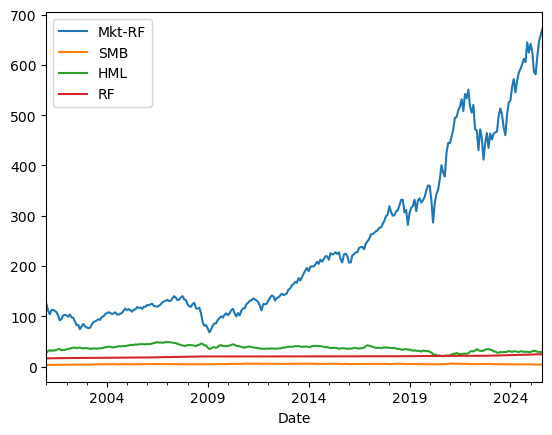

In [29]:
cum_ret_01 = cum_return[(cum_return.index >= "2001-01-01")]
cum_ret_01.plot()

## 2
### 1. Does each factor have a premium in each subsample?
No, SMB in the 1981-2001 subsample has a loss of 0.2%
### 2. Does the premium to the size factor get smaller after 1980?
Yes, The mean for SMB declined after 1980 and it recovered from -0.2% to 0.79% in 2002, however it never returned to the mean of 3.39% before 1980.
### 3. Does the premium to the value factor get smaller during the 1990's?
Based on the graph, the 1990s shows a volatile period, but based on the return in the beginning of 1990 and the last return in 1999, the value factor remain stable
### 4. How have the factors performed since the time of the case, (2002 - present)?
The market factor increased significantly while the remaining factors remained stable.

Text(0.5, 1.0, 'Correlation Heatmap')

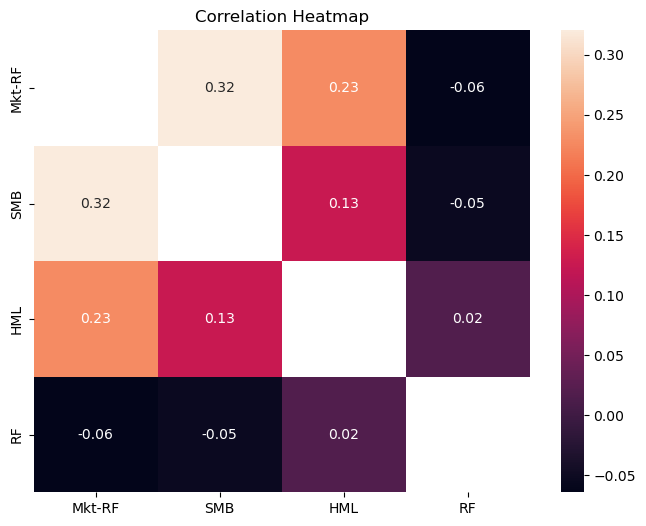

In [ ]:
df_corr = df.copy()

correlation = df.corr()
np.fill_diagonal(correlation.values, np.nan)

plt.figure(figsize = (8,6))
sns.heatmap(correlation, annot = True, fmt = '.2f')
plt.title('Correlation Heatmap')

In [ ]:
# Ensure datetime index
if 'Date' in df.columns:
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date').sort_index()

cols = [c for c in ['Mkt-RF', 'SMB', 'HML'] if c in df.columns]

# Define subsamples
subsamples = {
    "Beg-1980": (None, "1980-12-31"),
    "1981-2001": ("1981-01-01", "2001-12-31"),
    "2002-End": ("2002-01-01", None),
}

# Compute correlations per subsample
corrs = {}
for name, (start, end) in subsamples.items():
    sub = df.loc[start:end, cols]
    corrs[name] = sub.corr()

# Combined output (MultiIndex on rows)
corr_by_period = pd.concat(corrs, names=["Period", "Row"])
print(corr_by_period)

                    Mkt-RF       SMB       HML
Period    Row                                 
Beg-1980  Mkt-RF  1.000000  0.374234  0.442341
          SMB     0.374234  1.000000  0.313397
          HML     0.442341  0.313397  1.000000
1981-2001 Mkt-RF  1.000000  0.158652 -0.529912
          SMB     0.158652  1.000000 -0.445451
          HML    -0.529912 -0.445451  1.000000
2002-End  Mkt-RF  1.000000  0.316034  0.109671
          SMB     0.316034  1.000000  0.116227
          HML     0.109671  0.116227  1.000000


## 3.The factors are constructed in such a way as to reduce correlation between them.

### 1. Report the correlation matrix across the three factors.
see the table above
### 2. Does the construction method succeed in keeping correlations small?
No, the correlation are not close to 0, see the correlation heatmap above
### 3. Does it achieve this in each subsample?
No, the correlation are not close to 0 in all of the subsample periods.

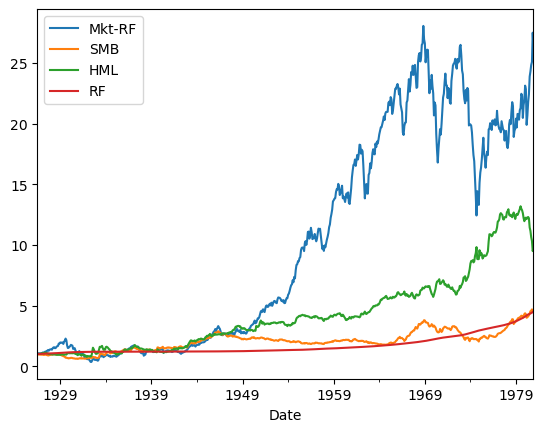

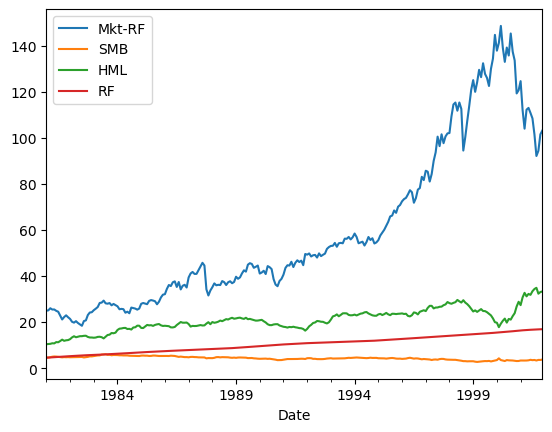

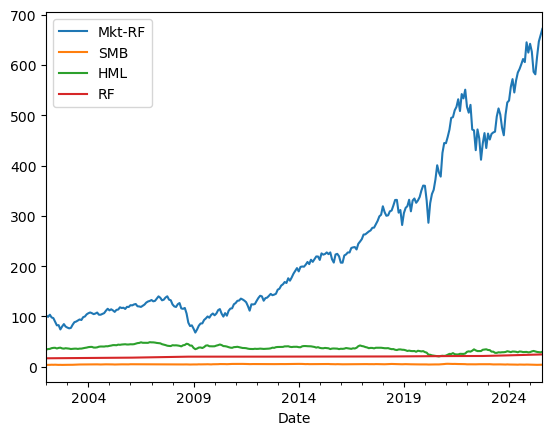

In [33]:
cum_ret_beg_80 = cum_return[(cum_return.index <= "1980-12-31")]
cum_ret_81_01 = cum_return[(cum_return.index >= "1981-01-01") & (cum_return.index <= "2001-12-31")]
cum_ret_02_end = cum_return[(cum_return.index >= "2002-01-01")]

list_sample_acum = [cum_ret_beg_80, cum_ret_81_01, cum_ret_02_end]

for sample in list_sample_acum:
    sample.plot()


# for i in range(len(list_sample_acum)):
#     list_sample_acum[i].plot(title = list_titles[i])

## 5. 
### 1. Does it appear that all three factors were valuable in 1981 - 2001?
all of the factors are increasing 
### 2. And Post 2001?
after 2001, only the market continues to offer a meaningful premium. Size and value no longer deliver significant premia

No, because the SMB and HML factor remain stable post 2001

# CAPM

In [39]:
sheetname_2 = "portfolios (total returns)"

df_2 = pd.read_excel(filename, sheet_name = sheetname_2)
df_2.set_index("Date", inplace = True)
df_2

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.058276,-0.017006,0.005118,-0.021477,0.019583,0.012118,0.024107,0.006056,-0.026082,-0.004527,...,0.015376,0.015460,0.013389,0.002765,0.024678,0.033248,0.060909,0.020285,0.031263,0.005623
1926-08-31,-0.020206,-0.080282,0.013968,0.021483,0.085104,0.023620,-0.007525,0.038984,0.002299,0.062937,...,0.013858,0.038587,0.019738,0.021336,0.053422,0.010169,0.041975,0.019769,0.054924,0.077576
1926-09-30,-0.048291,-0.026806,-0.043417,-0.032683,0.008586,-0.026849,-0.005252,0.010789,-0.032877,-0.009419,...,0.016897,-0.005246,-0.017724,0.014806,0.008730,-0.012951,0.036610,0.001384,-0.007497,-0.024284
1926-10-31,-0.093633,-0.035519,-0.035024,0.034413,-0.025452,-0.028014,-0.044191,-0.050767,-0.080271,-0.013213,...,-0.039136,-0.026528,-0.021058,-0.032532,-0.053525,-0.027382,-0.030061,-0.022467,-0.046725,-0.058129
1926-11-30,0.055888,0.041877,0.024384,-0.044495,0.005110,0.031023,-0.017317,0.030425,0.049538,0.027292,...,0.034492,0.023823,0.037315,0.051102,0.018213,0.044331,0.025355,0.015280,0.036596,0.025636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,0.008068,0.016903,0.008944,-0.006342,-0.025251,0.005969,-0.009047,-0.024543,-0.031368,-0.063772,...,-0.008766,-0.012699,-0.020146,-0.039276,-0.072668,0.014106,-0.030129,-0.073867,-0.013472,-0.027941
2025-05-31,0.108449,0.057624,0.053431,0.042479,0.057172,0.044605,0.050800,0.069533,0.050692,0.058568,...,0.062577,0.050222,0.035353,0.081175,0.065826,0.078077,0.061296,0.018407,0.026156,0.065684
2025-06-30,0.138579,0.058805,0.086403,0.046825,0.055347,0.062285,0.066343,0.073562,0.056160,0.050304,...,0.020351,0.043192,0.024175,0.073815,0.058024,0.055279,0.062451,0.047405,0.036424,0.070109


In [ ]:
df_2.apply(lambda x: x - df["RF"], axis = 0)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.056076,-0.019206,0.002918,-0.023677,0.017383,0.009918,0.021907,0.003856,-0.028282,-0.006727,...,0.013176,0.013260,0.011189,0.000565,0.022478,0.031048,0.058709,0.018085,0.029063,0.003423
1926-08-31,-0.022706,-0.082782,0.011468,0.018983,0.082604,0.021120,-0.010025,0.036484,-0.000201,0.060437,...,0.011358,0.036087,0.017238,0.018836,0.050922,0.007669,0.039475,0.017269,0.052424,0.075076
1926-09-30,-0.050591,-0.029106,-0.045717,-0.034983,0.006286,-0.029149,-0.007552,0.008489,-0.035177,-0.011719,...,0.014597,-0.007546,-0.020024,0.012506,0.006430,-0.015251,0.034310,-0.000916,-0.009797,-0.026584
1926-10-31,-0.096833,-0.038719,-0.038224,0.031213,-0.028652,-0.031214,-0.047391,-0.053967,-0.083471,-0.016413,...,-0.042336,-0.029728,-0.024258,-0.035732,-0.056725,-0.030582,-0.033261,-0.025667,-0.049925,-0.061329
1926-11-30,0.052788,0.038777,0.021284,-0.047595,0.002010,0.027923,-0.020417,0.027325,0.046438,0.024192,...,0.031392,0.020723,0.034215,0.048002,0.015113,0.041231,0.022255,0.012180,0.033496,0.022536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,0.004568,0.013403,0.005444,-0.009842,-0.028751,0.002469,-0.012547,-0.028043,-0.034868,-0.067272,...,-0.012266,-0.016199,-0.023646,-0.042776,-0.076168,0.010606,-0.033629,-0.077367,-0.016972,-0.031441
2025-05-31,0.104649,0.053824,0.049631,0.038679,0.053372,0.040805,0.047000,0.065733,0.046892,0.054768,...,0.058777,0.046422,0.031553,0.077375,0.062026,0.074277,0.057496,0.014607,0.022356,0.061884
2025-06-30,0.135179,0.055405,0.083003,0.043425,0.051947,0.058885,0.062943,0.070162,0.052760,0.046904,...,0.016951,0.039792,0.020775,0.070415,0.054624,0.051879,0.059051,0.044005,0.033024,0.066709


In [ ]:
independent_variables = "Mkt-RF"

X = df[independent_variables]             # Select independent variables
X = sm.add_constant(X)                                # Add intercept term (alpha)
for dep in df_2.columns:                    # Select dependent variable
    y = df_2[dep]
    # === Fit the OLS regression ===
    model = sm.OLS(y, X).fit()

    # === Store regression coefficients (Betas) ===
    df_linear_info = pd.DataFrame(
        model.params[independent_variables].values * 100,  # Convert to percentage
        index=["Beta_" + i for i in independent_variables],
        columns=[dep]
    )

    # === Store alpha (intercept), R², and standard error of residuals ===
    if is_intercept == True:
        df_linear_info.loc["Alpha"] = model.params["const"] * 100 * temp
    else:
        df_linear_info.loc["Alpha"] = 0